#Dog Emotion Classification Prediction
Ariann Fernando Arriaga Alcántara A01703556

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
%cd "/content/drive/MyDrive/SEMESTRE 8/Desarrollo de aplicaciones avanzadas/Módulo 2 A01703556"
!ls

/content/drive/MyDrive/SEMESTRE 8/Desarrollo de aplicaciones avanzadas/Módulo 2 A01703556
DogEmotionClassificationModel_A01703556.ipynb  files			     test
DogEmotionPrediction.ipynb		       modelClassificationDog.h5     train
ExamplesPredict				       modelClassificationDog.keras  validation


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.math import confusion_matrix
import os

#Direcctorio de test
test_dir = 'test'

In [11]:
model = load_model('modelClassificationDog.h5')

In [12]:
model2 = load_model('modelClassificationDog.keras')

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 50,
					class_mode= 'categorical')


Found 450 images belonging to 3 classes.


In [19]:
# Evaluación del modelo en el conjunto de prueba
test_loss_vgg_16, test_acc_vgg_16 = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('\nTest Accuracy:\n', test_acc_vgg_16)
print('\nTest Loss:\n', test_loss_vgg_16)

9/9 [==============================] - 3s 298ms/step - loss: 0.7867 - acc: 0.7533

Test Accuracy:
 0.753333330154419

Test Loss:
 0.7867445349693298


In [20]:
from sklearn.metrics import classification_report
# Predicciones y matriz de confusión
test_generator.reset()
num_batches = len(test_generator)
all_test_labels = []
all_predictions = []

# Iterar sobre todos los batches
for i in range(num_batches):
    batch = test_generator[i]
    images, label = batch
    predict = model.predict(images)

    y_predicted_labels = np.argmax(predict, axis=1)
    label = np.argmax(label, axis=1)

    all_test_labels.extend(label)
    all_predictions.extend(y_predicted_labels)

# Convertir a arrays numpy
all_test_labels = np.array(all_test_labels)
all_predictions = np.array(all_predictions)

# Matriz de confusión
cm = confusion_matrix(all_test_labels, all_predictions)

# Reporte de clasificación
target_names = list(test_generator.class_indices.keys())
print('Classification Report')
print(classification_report(all_test_labels, all_predictions , target_names=target_names))


2/2 [==============================] - 0s 54ms/step
Classification Report
              precision    recall  f1-score   support

       angry       0.76      0.59      0.67       150
       happy       0.72      0.81      0.76       150
         sad       0.78      0.86      0.82       150

    accuracy                           0.75       450
   macro avg       0.75      0.75      0.75       450
weighted avg       0.75      0.75      0.75       450



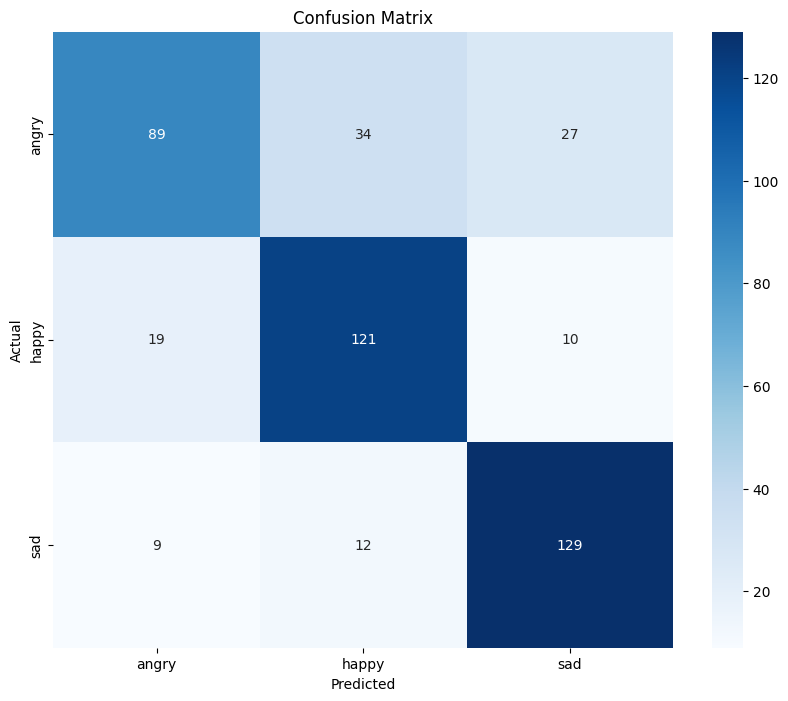

In [21]:
# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [33]:
path = "ExamplesPredict"

labels = ["Angry", "Happy", "Sad"]
images = []
predictions = []

for item in os.listdir(path):
    img_path = os.path.join(path, item)
    image = tf.keras.utils.load_img(img_path, target_size=(150, 150))
    images.append(image)
    image = np.array(image)
    image = image / 255.0
    image = image.reshape(1, 150, 150, 3)
    predict = model.predict(image)
    predict = np.argmax(predict)
    predictions.append(labels[predict])
    print(labels[predict])

1/1 [==============================] - 0s 20ms/step
Happy
1/1 [==============================] - 0s 18ms/step
Angry
1/1 [==============================] - 0s 20ms/step
Happy
1/1 [==============================] - 0s 20ms/step
Happy
1/1 [==============================] - 0s 37ms/step
Happy
1/1 [==============================] - 0s 39ms/step
Happy
1/1 [==============================] - 0s 31ms/step
Happy
1/1 [==============================] - 0s 30ms/step
Happy
1/1 [==============================] - 0s 33ms/step
Sad
1/1 [==============================] - 0s 27ms/step
Angry
1/1 [==============================] - 0s 28ms/step
Sad


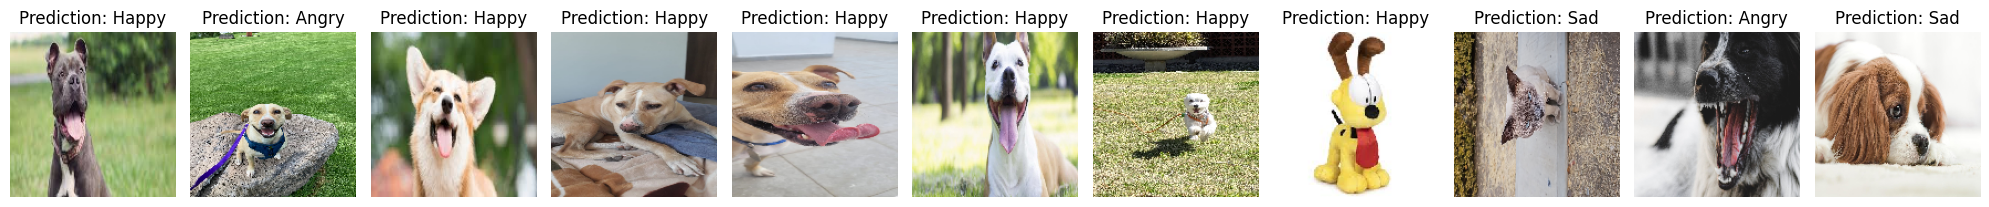

In [34]:
fig = plt.figure(figsize=(20, 20))
num_images = len(images)
# Recorrer y mostrar cada imagen con su predicción
for i in range(num_images):
    ax = fig.add_subplot(1, num_images, i + 1)
    ax.imshow(images[i])
    ax.set_title(f"Prediction: {predictions[i]}")
    ax.axis('off')

fig.tight_layout()
plt.show()